In [7]:
%reload_ext autoreload
%autoreload 2

In [8]:
from matplotlib import pyplot as plt
from pathlib import Path
import os
import pandas as pd

In [9]:
exps_root = Path("../output/evaluations")

rank_k = exps_root.glob("**/rank_k.csv")
rank_k_results = []
for rank_k_file in rank_k:
    df = pd.read_csv(rank_k_file, header=0)
    rank_1 = (df["k"] < 1).mean()
    rank_50 = (df["k"] < 50).mean()
    exp_seed = int(str(rank_k_file).split("/")[-3][4:])
    exp_name = str(rank_k_file).split("/")[-2]
    if exp_name.split("_")[0] == "ce":
        cross_eval = True
        embedder = exp_name.split("_")[1]
        eps = exp_name.split("_")[-1][3:]
        regions = "_".join(exp_name.split("_")[2:-1])
    else:
        cross_eval = False
        embedder = exp_name.split("_")[0]
        eps = exp_name.split("_")[-1][3:]
        regions = "_".join(exp_name.split("_")[1:-1])

    rank_k_results.append({
        "seed": exp_seed,
        "cross_eval": cross_eval,
        "embedder": embedder,
        "eps": eps,
        "regions": regions,
        "rank_1": rank_1,
        "rank_50": rank_50
    })
rank_k_df = pd.DataFrame(rank_k_results)

verify = exps_root.glob("**/verification.csv")
verify_results = []
for verify_file in verify:
    df = pd.read_csv(verify_file, header=0)
    acc = df['match'].mean()
    exp_seed = int(str(verify_file).split("/")[-3][4:])
    exp_name = str(verify_file).split("/")[-2]
    if exp_name.split("_")[0] == "ce":
        cross_eval = True
        embedder = exp_name.split("_")[1]
        eps = exp_name.split("_")[-1][3:]
        regions = "_".join(exp_name.split("_")[2:-1])
    else:
        cross_eval = False
        embedder = exp_name.split("_")[0]
        eps = exp_name.split("_")[-1][3:]
        regions = "_".join(exp_name.split("_")[1:-1])

    verify_results.append({
        "seed": exp_seed,
        "cross_eval": cross_eval,
        "embedder": embedder,
        "eps": eps,
        "regions": regions,
        "match_rate": acc
    })
verify_df = pd.DataFrame(verify_results)

utility = exps_root.glob("**/utility.csv")
utility_results = []
for utility_file in utility:
    df = pd.read_csv(utility_file, header=0)
    ssim, psnr, emotion_match, gender_match, race_match, age_diff = df.iloc[0]
    seed = int(str(utility_file).split("/")[-3][4:])
    exp_name = str(utility_file).split("/")[-2]
    embedder = exp_name.split("_")[0]
    eps = exp_name.split("_")[-1][3:]
    regions = "_".join(exp_name.split("_")[1:-1])

    utility_results.append({
        "seed": seed,
        "cross_eval": False,
        "embedder": embedder,
        "eps": eps,
        "regions": regions,
        "ssim": ssim,
        "psnr": psnr,
        "emotion_match": emotion_match,
        "gender_match": gender_match,
        "race_match": race_match,
        "age_diff": age_diff
    })
utility_df = pd.DataFrame(utility_results)

In [10]:
df = rank_k_df.merge(verify_df, on=["embedder", "eps", "regions", "seed", "cross_eval"]).merge(utility_df, on=["embedder", "eps", "regions", "seed", "cross_eval"], how="outer")
df.where(df["seed"] == 42).dropna(axis=0, how='all').sort_values(by=["cross_eval", "embedder", "regions", "eps"])

seed cross_eval         embedder     eps             regions  rank_1  \
0    42.0      False        acadaface   0.100                 all     0.0   
7    42.0      False          adaface   0.050                 all     1.0   
17   42.0      False          adaface   0.100                 all     0.0   
29   42.0      False          adaface   0.200                 all     0.0   
41   42.0      False          adaface   0.300                 all     0.0   
21   42.0      False          adaface   0.100  eyes_forehead_nose     1.0   
33   42.0      False          adaface   0.200  eyes_forehead_nose     0.0   
45   42.0      False          adaface   0.300  eyes_forehead_nose     0.0   
22   42.0      False          adaface   0.100  forehead_lips_nose     1.0   
34   42.0      False          adaface   0.200  forehead_lips_nose     0.1   
46   42.0      False          adaface   0.300  forehead_lips_nose     0.0   
53   42.0      False          arcface   0.050                 all     1.0   
63   42.0      False          arcface   0.100                 all     0.4   
75   42.0      False          arcface   0.200                 all     0.0   
87   42.0      False          arcface   0.300                 all     0.0   
67   42.0      False          arcface   0.100  eyes_forehead_nose     1.0   
79   42.0      False          arcface   0.200  eyes_forehead_nose     0.8   
91   42.0      False          arcface   0.300  eyes_forehead_nose     0.3   
68   42.0      False          arcface   0.100  forehead_lips_nose     1.0   
80   42.0      False          arcface   0.200  forehead_lips_nose     1.0   
92   42.0      False          arcface   0.300  forehead_lips_nose     0.7   
93   42.0      False       ddnadaface   0.100                 all     0.8   
94   42.0      False    l2fgsmadaface  10.000                 all     0.9   
95   42.0      False    l2fgsmadaface   5.000                 all     1.0   
96   42.0      False     l2pgdadaface  10.000                 all     0.0   
97   42.0      False     l2pgdadaface   5.000                 all     0.1   
98   42.0      False  linffgsmadaface   0.100                 all     1.0   
99   42.0      False   opacityadaface   0.100                 all     1.0   
100  42.0      False       posadaface   0.100                 all     0.0   
101  42.0      False       rotadaface   0.100                 all     1.0   
102  42.0      False     scaleadaface   0.100                 all     1.0   
8    42.0       True          adaface   0.050                 all     1.0   
18   42.0       True          adaface   0.100                 all     0.0   
30   42.0       True          adaface   0.200                 all     0.0   
42   42.0       True          adaface   0.300                 all     0.0   
54   42.0       True          arcface   0.050                 all     1.0   
64   42.0       True          arcface   0.100                 all     0.6   
76   42.0       True          arcface   0.200                 all     0.0   
88   42.0       True          arcface   0.300                 all     0.0   

     rank_50  match_rate      ssim       psnr  emotion_match  gender_match  \
0        0.0         0.0  0.651540  22.609093            0.4           0.9   
7        1.0         1.0  0.985906  41.388187            0.8           1.0   
17       0.0         0.0  0.992731  43.781470            0.9           1.0   
29       0.0         0.0  0.881177  30.082216            0.8           1.0   
41       0.0         0.0  0.813851  27.296440            0.8           1.0   
21       1.0         1.0  0.985563  40.839407            0.9           1.0   
33       0.1         0.1  0.956280  35.254117            0.9           1.0   
45       0.0         0.0  0.924828  32.150215            0.9           1.0   
22       1.0         1.0  0.985997  41.278761            0.8           1.0   
34       0.7         0.7  0.958399  35.727913            0.8           0.9   
46       0.0         0.0  0.928713  32.612006            0.8      

In [57]:
# mean (+- std) metrics over seeds
# display each as mean (std)
mean_df = df.groupby(["embedder", "eps", "regions", "cross_eval"]).agg(['mean', 'std']).reset_index()
mean_df.columns = ['_'.join(col).strip('_') for col in mean_df.columns.values]

temp = mean_df.where((mean_df['cross_eval'] == False) & (mean_df['regions'] == 'all')).sort_values(by=["embedder", "eps"]).reset_index(drop=True)
# set notation to normal floats for numeric columns
temp

embedder    eps regions cross_eval  seed_mean   seed_std  rank_1_mean  \
0   adaface  0.050     all      False       39.8  36.928309          0.6   
1   adaface  0.100     all      False       39.8  36.928309          0.0   
2   adaface  0.200     all      False       39.8  36.928309          0.0   
3   adaface  0.300     all      False       39.8  36.928309          0.0   
4   arcface  0.050     all      False       39.8  36.928309          1.0   
5   arcface  0.100     all      False       39.8  36.928309          0.7   
6   arcface  0.200     all      False       39.8  36.928309          0.2   
7   arcface  0.300     all      False       39.8  36.928309          0.0   
8       NaN    NaN     NaN        NaN        NaN        NaN          NaN   
9       NaN    NaN     NaN        NaN        NaN        NaN          NaN   
10      NaN    NaN     NaN        NaN        NaN        NaN          NaN   
11      NaN    NaN     NaN        NaN        NaN        NaN          NaN   
12      NaN    NaN     NaN        NaN        NaN        NaN          NaN   
13      NaN    NaN     NaN        NaN        NaN        NaN          NaN   
14      NaN    NaN     NaN        NaN        NaN        NaN          NaN   
15      NaN    NaN     NaN        NaN        NaN        NaN          NaN   
16      NaN    NaN     NaN        NaN        NaN        NaN          NaN   
17      NaN    NaN     NaN        NaN        NaN        NaN          NaN   
18      NaN    NaN     NaN        NaN        NaN        NaN          NaN   
19      NaN    NaN     NaN        NaN        NaN        NaN          NaN   
20      NaN    NaN     NaN        NaN        NaN        NaN          NaN   
21      NaN    NaN     NaN        NaN        NaN        NaN          NaN   
22      NaN    NaN     NaN        NaN        NaN        NaN          NaN   
23      NaN    NaN     NaN        NaN        NaN        NaN          NaN   
24      NaN    NaN     NaN        NaN        NaN        NaN          NaN   
25      NaN    NaN     NaN        NaN        NaN        NaN          NaN   
26      NaN    NaN     NaN        NaN        NaN        NaN          NaN   
27      NaN    NaN     NaN        NaN        NaN        NaN          NaN   
28      NaN    NaN     NaN        NaN        NaN        NaN          NaN   
29      NaN    NaN     NaN        NaN        NaN        NaN          NaN   
30      NaN    NaN     NaN        NaN        NaN        NaN          NaN   
31      NaN    NaN     NaN        NaN        NaN        NaN          NaN   
32      NaN    NaN     NaN        NaN        NaN        NaN          NaN   
33      NaN    NaN     NaN        NaN        NaN        NaN          NaN   

    rank_1_std  rank_50_mean  rank_50_std  ...  psnr_mean  psnr_std  \
0          0.0          0.80     0.000000  ...  41.480798  0.000876   
1          0.0          0.00     0.000000  ...  35.755491  0.000959   
2          0.0          0.00     0.000000  ...  30.895884  0.002610   
3          0.0          0.00     0.000000  ...  28.597584  0.000277   
4          0.0          1.00     0.000000  ...  41.364560  0.001449   
5          0.0          0.90     0.000000  ...  36.011018  0.000495   
6          0.0          0.32     0.044721  ...  31.580615  0.005512   
7          0.0          0.10     0.000000  ...  29.339235  0.004350   
8          NaN           NaN          NaN  ...        NaN       NaN   
9          NaN           NaN          NaN  ...        NaN       NaN   
10         NaN           NaN          NaN  ...        NaN       NaN   
11         NaN           NaN          NaN  ...        NaN       NaN   
12         NaN           NaN          NaN  ...        NaN       NaN   
13         NaN           NaN          NaN  ...        NaN       NaN   
14         NaN           NaN          NaN  ...        NaN       NaN   
15         NaN           NaN          NaN  ...        NaN       NaN   
16         NaN           NaN          NaN  ...        NaN       NaN   
17         NaN           NaN          NaN  ...        NaN       

In [ ]:
import sys
from pathlib import Path
from aegis.models import AdaFaceEmbedder, ArcFaceEmbedder
from aegis.utils import plot_single_frame
sys.path.append(Path('../GaussianAvatars').resolve().as_posix())
from aegis.splat import load_gaussians, PipelineConfig, render_single_frame, reset_flame_params
from utils.viewer_utils import OrbitCamera

pipeline = PipelineConfig(
    background_color=[1., 1., 1.]
)

W: int = 540
H: int = 540
radius: float = 0.9
fovy: float = 20

root_cam = OrbitCamera(W, H, r=radius, fovy=fovy, convention='opencv')
model = AdaFaceEmbedder('cuda', 5, '../models', 'ir50')

Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'sdpa_kernel': '0', 'use_tf32': '1', 'fuse_conv_bias': '0', 'prefer_nhwc': '0', 'tunable_op_max_tuning_duration_ms': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_tuning_enable': '0', 'tunable_op_enable': '0', 'use_ep_level_unified_stream': '0', 'device_id': '0', 'has_user_compute_stream': '0', 'gpu_external_empty_cache': '0', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'cudnn_conv1d_pad_to_nc1d': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_alloc': '0', 'gpu_external_free': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'do_copy_in_default_stream': '1', 'enable_cuda_graph': '0', 'user_compute_stream': '0', 'cudnn_conv_use_max_workspace': '1'}}


In [2]:
from glob import glob

import numpy as np
import torch
references = glob('../datasets/NeRSembleGT/images/306/*.png')
references = torch.from_numpy(np.array(list(model.embed(references, lambda x: x).values())))

Embedding images with AdaFace: 100%|██████████| 5/5 [00:01<00:00,  4.81it/s]


In [3]:
import torch
def get_sim(emb):
    emb = torch.from_numpy(emb).unsqueeze(0)
    # max similarity to all reference embeddings
    return torch.clip(
        torch.cosine_similarity(emb, references, dim=1),
        min=-1.0,
        max=1.0,
    ).max().item()
    
def render_embed_rot_ims(gaussians, name_prefix):
    reset_flame_params(gaussians)

    rgb = render_single_frame(gaussians, root_cam, pipeline)
    rgb_np = np.clip(rgb.cpu().detach().numpy(), 0, 1) * 255
    img = Image.fromarray(rgb_np.astype(np.uint8))
    img.save(f"temp/{name_prefix}.png")
    
    gaussians.select_mesh_by_timestep(400)

    root_cam.orbit_y(0.3)
    rgb = render_single_frame(gaussians, root_cam, pipeline)
    rgb_np = np.clip(rgb.cpu().detach().numpy(), 0, 1) * 255
    img = Image.fromarray(rgb_np.astype(np.uint8))
    img.save(f"temp/{name_prefix}3.png")
    
    gaussians.select_mesh_by_timestep(100)

    root_cam.orbit_y(0.2)
    rgb = render_single_frame(gaussians, root_cam, pipeline)
    rgb_np = np.clip(rgb.cpu().detach().numpy(), 0, 1) * 255
    img = Image.fromarray(rgb_np.astype(np.uint8))
    img.save(f"temp/{name_prefix}5.png")
    
    gaussians.select_mesh_by_timestep(1100)

    root_cam.orbit_y(-1.0)
    rgb = render_single_frame(gaussians, root_cam, pipeline)
    rgb_np = np.clip(rgb.cpu().detach().numpy(), 0, 1) * 255
    img = Image.fromarray(rgb_np.astype(np.uint8))
    img.save(f"temp/{name_prefix}-3.png")
    
    gaussians.select_mesh_by_timestep(50)

    root_cam.orbit_y(-0.2)
    rgb = render_single_frame(gaussians, root_cam, pipeline)
    rgb_np = np.clip(rgb.cpu().detach().numpy(), 0, 1) * 255
    img = Image.fromarray(rgb_np.astype(np.uint8))
    img.save(f"temp/{name_prefix}-5.png")

    root_cam.orbit_y(0.7)

    embeds = model.embed([f"temp/{name_prefix}5.png", f"temp/{name_prefix}3.png", f"temp/{name_prefix}.png", f"temp/{name_prefix}-3.png", f"temp/{name_prefix}-5.png"], lambda x: x)
    sims = {k: get_sim(v) for k, v in embeds.items()}
    return sims

def crop_to_square(img):
    """Crops a numpy image array to a square."""
    h, w, _ = img.shape
    if h > w:
        crop = (h - w) // 2
        img = img[crop:crop+w, :, :]
    else:
        crop = (w - h) // 2
        img = img[:, crop:crop+h, :]
    return img

In [4]:
import numpy as np
from PIL import Image

gaussians = load_gaussians(Path("../datasets/NeRSembleReconst/avatars/306/point_cloud.ply"))
name_prefix = "original"

similarities_orig = render_embed_rot_ims(gaussians, "original")

Embedding images with AdaFace:  50%|█████     | 1/2 [00:00<00:00,  8.86it/s]


In [19]:
gaussians = load_gaussians(Path("../datasets/seed42/NeRSembleMasked_adaface_all/eps_0.100/avatars/306/point_cloud.ply"))
name_prefix = "low"

similarities_masked_low = render_embed_rot_ims(gaussians, "low")

Embedding images with AdaFace:  50%|█████     | 1/2 [00:00<00:00, 12.48it/s]


In [20]:
gaussians = load_gaussians(Path("../datasets/seed42/NeRSembleMasked_adaface_all/eps_0.200/avatars/306/point_cloud.ply"))
name_prefix = "high"

similarities_masked_high = render_embed_rot_ims(gaussians, "high")

Embedding images with AdaFace:  50%|█████     | 1/2 [00:00<00:00,  8.16it/s]


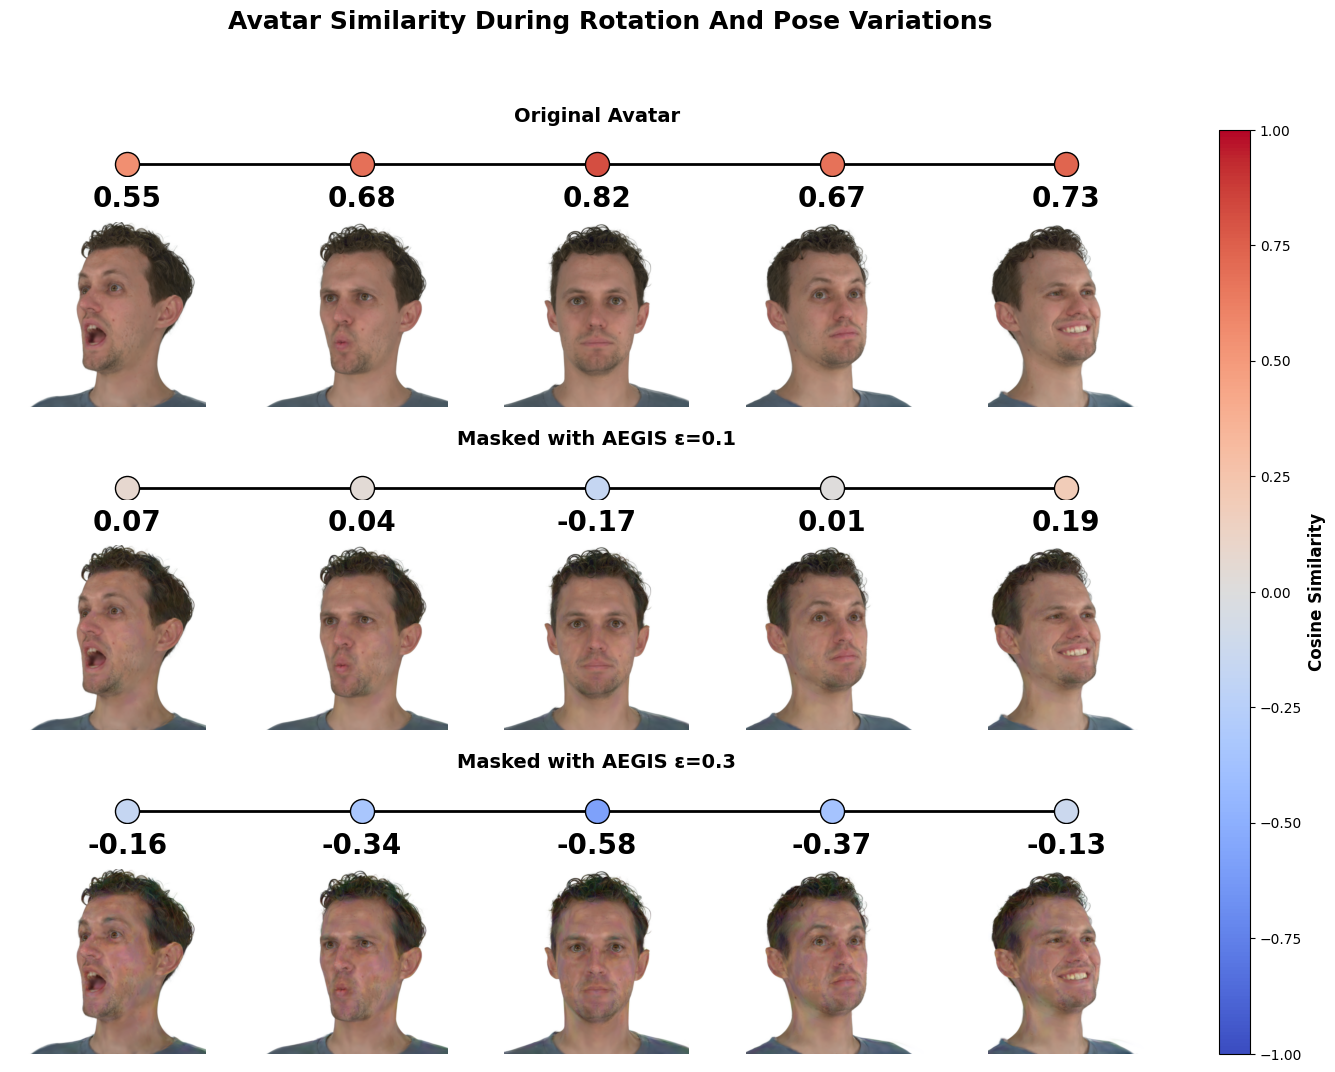

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm, colors

# Order 5, 3, _, -3, -5
ordered_orig = ['temp/original5.png', 'temp/original3.png', 'temp/original.png', 'temp/original-3.png', 'temp/original-5.png']
ordered_masked_low = ['temp/low5.png', 'temp/low3.png', 'temp/low.png', 'temp/low-3.png', 'temp/low-5.png']
ordered_masked_high = ['temp/high5.png', 'temp/high3.png', 'temp/high.png', 'temp/high-3.png', 'temp/high-5.png']

x = np.arange(5)
cmap = cm.coolwarm
norm = colors.Normalize(vmin=-1.0, vmax=1.0)

fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(6, 6, width_ratios=[1,1,1,1,1,0.15], height_ratios=[1, 4, 1, 4, 1, 4], hspace=0.4, wspace=0.2)

# --- Helper function to plot straight line with numbers ---
def plot_straight_line(ax, x, y, cmap, norm, label):
    y_line = 0.25  # ↓ Move line down (default was 0.5)
    y_text = -0.8  # ↓ Move text down (default was 0.7)

    colors_list = [cmap(norm(val)) for val in y]
    for i in range(len(x)):
        ax.scatter(x[i], y_line, c=[colors_list[i]], s=300, edgecolors='black', zorder=10)
        ax.text(x[i], y_text, f'{y[i]:.2f}', ha='center', va='bottom', fontsize=20, fontweight='bold')
    
    ax.plot(x, [y_line]*len(x), 'k-', linewidth=2, zorder=1)
    ax.set_xlim(-0.5, len(x) - 0.5)
    ax.set_ylim(0, 1)
    ax.axis('off')
    ax.set_title(label, fontsize=14, fontweight='bold')

# --- Image rows ---
axs_img1 = [fig.add_subplot(gs[1, i]) for i in range(5)]
axs_img2 = [fig.add_subplot(gs[3, i]) for i in range(5)]
axs_img3 = [fig.add_subplot(gs[5, i]) for i in range(5)]

for i, fname in enumerate(ordered_orig):
    try:
        img = plt.imread(fname)
        axs_img1[i].imshow(crop_to_square(img), zorder=1)
        if i == 0:
            axs_img1[i].set_ylabel('Original', fontsize=14, fontweight='bold')
    except FileNotFoundError:
        axs_img1[i].text(0.5, 0.5, "Missing\nImage", ha='center', va='center', color='red')
    axs_img1[i].axis('off')

for i, fname in enumerate(ordered_masked_low):
    try:
        img = plt.imread(fname)
        axs_img2[i].imshow(crop_to_square(img), zorder=1)
        if i == 0:
            axs_img2[i].set_ylabel('Masked Low', fontsize=14, fontweight='bold')
    except FileNotFoundError:
        axs_img2[i].text(0.5, 0.5, "Missing\nImage", ha='center', va='center', color='red')
    axs_img2[i].axis('off')
    
for i, fname in enumerate(ordered_masked_high):
    try:
        img = plt.imread(fname)
        axs_img3[i].imshow(crop_to_square(img), zorder=1)
        if i == 0:
            axs_img3[i].set_ylabel('Masked High', fontsize=14, fontweight='bold')
    except FileNotFoundError:
        axs_img3[i].text(0.5, 0.5, "Missing\nImage", ha='center', va='center', color='red')
    axs_img3[i].axis('off')
    
# --- Row 1: straight line for original similarities ---
ax_orig_line = fig.add_subplot(gs[0, :-1])
plot_straight_line(ax_orig_line, x, list(similarities_orig.values()), cmap, norm, "Original Avatar")

# --- Row 2: straight line for masked similarities ---
ax_mask_line = fig.add_subplot(gs[2, :-1])
plot_straight_line(ax_mask_line, x, list(similarities_masked_low.values()), cmap, norm, "Masked with AEGIS ε=0.1")

# --- Row 3: straight line for masked high similarities ---
ax_mask_line_high = fig.add_subplot(gs[4, :-1])
plot_straight_line(ax_mask_line_high, x, list(similarities_masked_high.values()), cmap, norm, "Masked with AEGIS ε=0.3")

# --- Single colorbar on the right ---
cbar_ax = fig.add_subplot(gs[:, -1])
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Cosine Similarity", fontsize=12, fontweight='bold')

fig.suptitle("Avatar Similarity During Rotation And Pose Variations", fontsize=18, fontweight='bold')
plt.savefig("figures/rotation.png", dpi=300, bbox_inches='tight')
plt.savefig("figures/rotation.pdf", bbox_inches='tight')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from pathlib import Path

W: int = 1920
H: int = 1080
radius: float = 1
fovy: float = 20

root_cam = OrbitCamera(W, H, r=radius, fovy=fovy, convention='opencv')

gaussians = load_gaussians(Path("../datasets/NeRSembleReconst/avatars/306/point_cloud.ply"))
orig_frames = []
t = np.linspace(0, 10 * 2 * np.pi, 1119)
camera_path = 0.5 * np.sin(t)

for idx, angle in enumerate(camera_path):
    try:
        gaussians.select_mesh_by_timestep(idx)
    except:
        torch.cuda.empty_cache()
        break
    root_cam.orbit_y(angle)
    rgb = render_single_frame(gaussians, root_cam, pipeline)
    rgb_np = np.clip(rgb.cpu().detach().numpy(), 0, 1) * 255
    img = rgb_np.astype(np.uint8)
    orig_frames.append(img)
    root_cam.orbit_y(-angle)

out = cv2.VideoWriter('original_video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (W, H))
for frame in orig_frames:
    out.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
out.release()

# calculate similarity every 30 frames
orig_sims = []
for i in range(0, len(orig_frames), 30):
    # save frame
    cv2.imwrite(f"frames/orig_frame_{i}.png", cv2.cvtColor(orig_frames[i], cv2.COLOR_RGB2BGR))
    emb = model.embed([f"frames/orig_frame_{i}.png"], lambda x: x)
    sim = get_sim(list(emb.values())[0])
    orig_sims.append(sim)
np.save('original_similarities.npy', np.array(orig_sims))

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from pathlib import Path

W: int = 1920
H: int = 1080
radius: float = 1
fovy: float = 20

root_cam = OrbitCamera(W, H, r=radius, fovy=fovy, convention='opencv')

gaussians = load_gaussians(Path("../datasets/seed42/NeRSembleMasked_adaface_all/eps_0.100/avatars/306/point_cloud.ply"))
masked_frames = []
t = np.linspace(0, 10 * 2 * np.pi, 1119)
camera_path = 0.5 * np.sin(t)

for idx, angle in enumerate(camera_path):
    try:
        gaussians.select_mesh_by_timestep(idx)
    except:
        torch.cuda.empty_cache()
        break
    root_cam.orbit_y(angle)
    rgb = render_single_frame(gaussians, root_cam, pipeline)
    rgb_np = np.clip(rgb.cpu().detach().numpy(), 0, 1) * 255
    img = rgb_np.astype(np.uint8)
    masked_frames.append(img)
    root_cam.orbit_y(-angle)

out = cv2.VideoWriter('masked_video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (W, H))
for frame in masked_frames:
    out.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
out.release()

# calculate similarity every 30 frames
masked_sims = []
for i in range(0, len(masked_frames), 30):
    # save frame
    cv2.imwrite(f"frames/masked_frame_{i}.png", cv2.cvtColor(masked_frames[i], cv2.COLOR_RGB2BGR))
    emb = model.embed([f"frames/masked_frame_{i}.png"], lambda x: x)
    sim = get_sim(list(emb.values())[0])
    masked_sims.append(sim)
np.save('masked_similarities.npy', np.array(masked_sims))

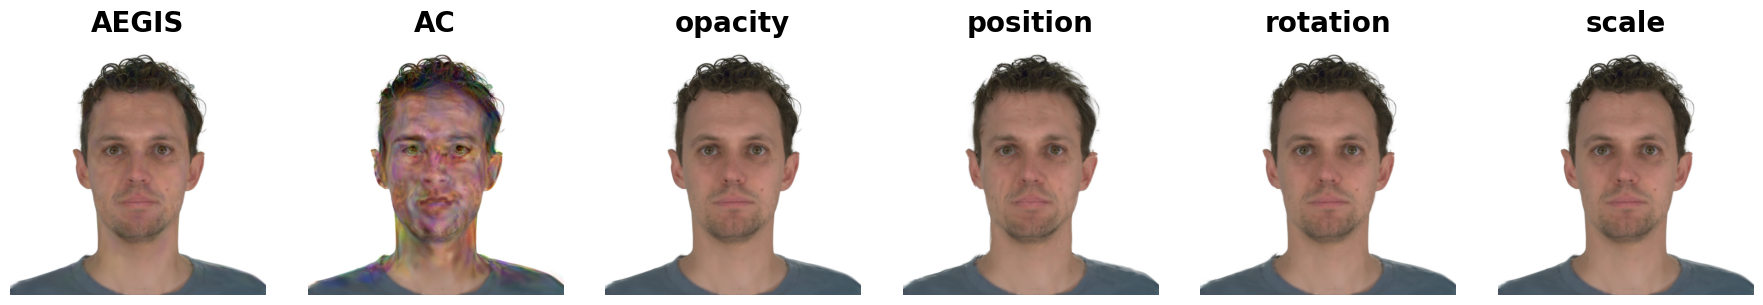

In [20]:
paths = {
    "AEGIS": "../datasets/seed42/NeRSembleMasked_adaface_all/eps_0.100/renders/306.png",
    "AC": "../datasets/seed42/ac_test_adaface_all/eps_0.100/renders/306.png",
    "opacity": "../datasets/seed42/opacity_test_adaface_all/eps_0.100/renders/306.png",
    "position": "../datasets/seed42/pos_test_adaface_all/eps_0.100/renders/306.png",
    "rotation": "../datasets/seed42/rot_test_adaface_all/eps_0.100/renders/306.png",
    "scale": "../datasets/seed42/scale_test_adaface_all/eps_0.100/renders/306.png"
}

import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 6, figsize=(18, 3))
for i, (method, path) in enumerate(paths.items()):
    try:
        img = plt.imread(path)
        axs[i].imshow(crop_to_square(np.clip(img, 0, 1)))
        axs[i].set_title(method, fontsize=20, fontweight='bold')
    except FileNotFoundError:
        axs[i].text(0.5, 0.5, "Missing\nImage", ha='center', va='center', color='red', fontsize=20)
    axs[i].axis('off')
plt.tight_layout()
plt.savefig("figures/diff_comps.png", dpi=300, bbox_inches='tight')
plt.show()

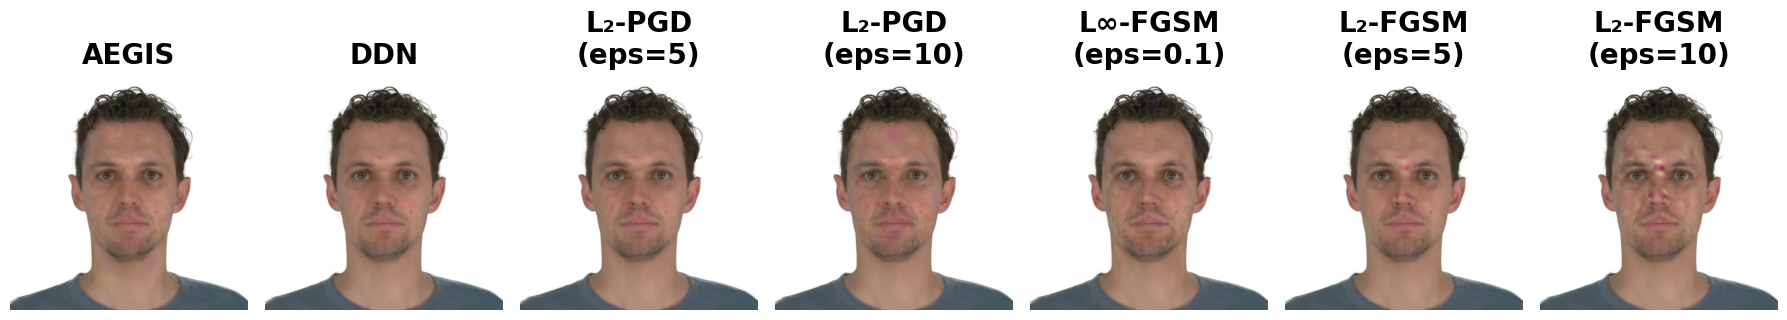

In [19]:
paths = {
    "AEGIS": "../datasets/seed42/NeRSembleMasked_adaface_all/eps_0.100/renders/306.png",
    "DDN": "../datasets/seed42/ddn_test_adaface_all/eps_0.100/renders/306.png",
    "L₂-PGD\n(eps=5)": "../datasets/seed42/l2pgd_test_adaface_all/eps_5.000/renders/306.png",
    "L₂-PGD\n(eps=10)": "../datasets/seed42/l2pgd_test_adaface_all/eps_10.000/renders/306.png",
    "L∞-FGSM\n(eps=0.1)": "../datasets/seed42/linffgsm_test_adaface_all/eps_0.100/renders/306.png",
    "L₂-FGSM\n(eps=5)": "../datasets/seed42/l2fgsm_test_adaface_all/eps_5.000/renders/306.png",
    "L₂-FGSM\n(eps=10)": "../datasets/seed42/l2fgsm_test_adaface_all/eps_10.000/renders/306.png"
}

import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 7, figsize=(18, 3))
for i, (method, path) in enumerate(paths.items()):
    try:
        img = plt.imread(path)
        axs[i].imshow(crop_to_square(np.clip(img, 0, 1)))
        axs[i].set_title(method, fontsize=20, fontweight='bold')
    except FileNotFoundError:
        axs[i].text(0.5, 0.5, "Missing\nImage", ha='center', va='center', color='red', fontsize=20)
    axs[i].axis('off')
plt.tight_layout()
plt.savefig("figures/diff_attacks.png", dpi=300, bbox_inches='tight')
plt.show()

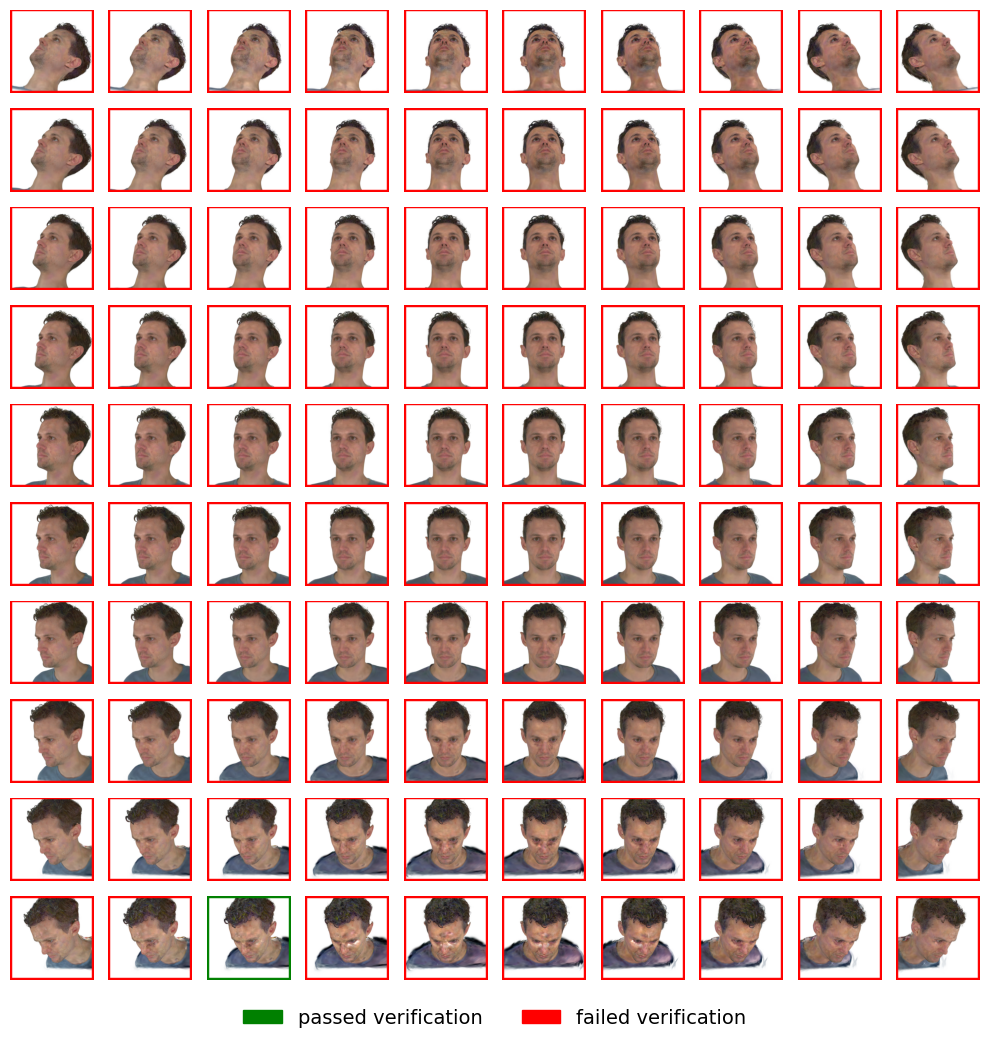

In [ ]:
# 10 x 10 grid of images on rotation manifold
# green border if similarity > 0.1840; red border otherwise
import os
from matplotlib import patches
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

eps = 0.1

gaussians = load_gaussians(Path(f"../datasets/seed42/NeRSembleMasked_adaface_all/eps_{eps:.3f}/avatars/306/point_cloud.ply"))
# gaussians = load_gaussians(Path("../datasets/NeRSembleReconst/avatars/306/point_cloud.ply"))
root_cam = OrbitCamera(W, H, r=radius, fovy=fovy, convention='opencv')

if not os.path.exists("grid"):
    os.makedirs("grid")

sims = []
fig = plt.figure(figsize=(10, 10))
for i in range(10):
    for j in range(10):
        # angles from 0.8 to -0.8 - linearly spaced
        angle_x = 0.8 - i * (1.6 / 9.0)
        angle_y = 0.8 - j * (1.6 / 9.0)

        root_cam.orbit_x(angle_x)
        root_cam.orbit_y(angle_y)

        rgb = render_single_frame(gaussians, root_cam, pipeline)
        rgb_np = np.clip(rgb.cpu().detach().numpy(), 0, 1) * 255
        img = Image.fromarray(rgb_np.astype(np.uint8))
        img.save(f"grid/{i}_{j}.png")
        
        embed = model.embed([f"grid/{i}_{j}.png"], lambda x: x)
        sim = get_sim(embed[f"grid/{i}_{j}.png"])
        sims.append(sim)
        
        img = Image.open(f"grid/{i}_{j}.png")
        img_np = crop_to_square(np.array(img))
        img = Image.fromarray(img_np.astype(np.uint8))
        # add border based on similarity
        border_color = 'green' if sim > 0.1840 else 'red'
        bordered_img = Image.new('RGB', (img.width + 30, img.height + 30), border_color)
        bordered_img.paste(img, (15, 15))
        bordered_img.save(f"grid/{i}_{j}.png")

        ax = fig.add_subplot(10, 10, i * 10 + j + 1)
        ax.imshow((np.array(Image.open(f"grid/{i}_{j}.png"))), zorder=1)
        ax.axis('off')

        root_cam.orbit_y(-angle_y)
        root_cam.orbit_x(-angle_x)
        
fig.legend(
    handles=[
        patches.Patch(facecolor='green', edgecolor='green', label=r'passed verification'),
        patches.Patch(facecolor='red', edgecolor='red', label=r'failed verification'),
    ],
    loc='lower center',
    bbox_to_anchor=(0.5, -0.05),
    ncol=3,
    frameon=False,
    fontsize=14
)

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.tight_layout()
plt.savefig(f"figures/rotation_grid_eps{eps}.png", dpi=300, bbox_inches='tight')
plt.savefig(f"figures/rotation_grid_eps{eps}.pdf", bbox_inches='tight')
plt.show()

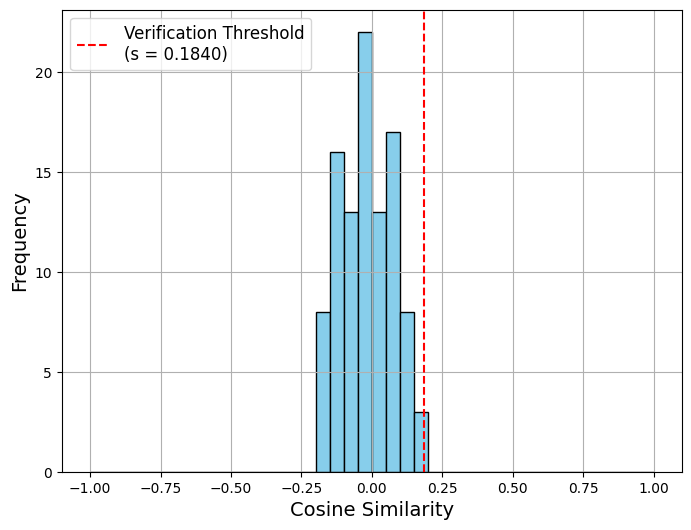

In [45]:
# histogram of similarities
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.hist(sims, bins=40, color='skyblue', edgecolor='black', range=(-1.0, 1.0))
plt.xlabel('Cosine Similarity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.axvline(x=0.1840, color='red', linestyle='--', label='Verification Threshold\n(s = 0.1840)')
plt.legend(fontsize=12, loc='upper left')

plt.savefig(f"figures/similarity_histogram_eps{eps}.png", dpi=300, bbox_inches='tight')
plt.show()

Generating vertical plot...
Saved vector PDF to: figure_comparison_vertical.pdf
Saved high-DPI PNG to: figure_comparison_vertical.png


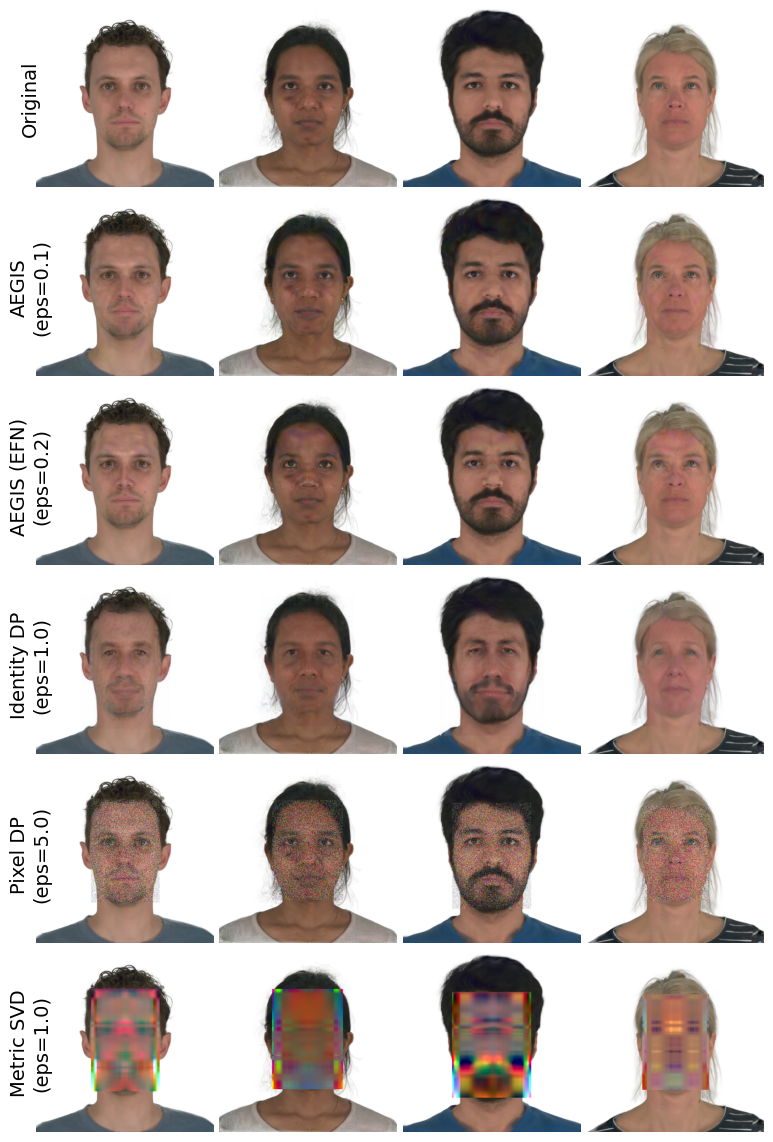

In [ ]:
import matplotlib.pyplot as plt
from pathlib import Path
import sys

ids = ["306", "264", "074", "302"]
base_path = Path("../datasets")

paths_config = {
    "Original": base_path / "NeRSembleReconst/renders/{id}.png",
    "AEGIS\n(eps=0.1)": base_path / "seed42" / "NeRSembleMasked_adaface_all/eps_0.100/renders/{id}.png",
    "AEGIS (EFN)\n(eps=0.2)": base_path / "seed42" / "NeRSembleMasked_adaface_eyes_forehead_nose/eps_0.200/renders/{id}.png",
    "Identity DP\n(eps=1.0)": base_path / "NeRSembleReconst_identity_dp_eps1.0/{id}.png",
    "Pixel DP\n(eps=5.0)": base_path / "NeRSembleReconst_pixel_dp_eps5.0_b1/{id}.png",
    "Metric SVD\n(eps=1.0)": base_path / "NeRSembleReconst_metric_privacy_eps1.0_k4/{id}.png"
}

row_titles = list(paths_config.keys())
col_ids = ids

num_rows = len(row_titles) # 6
num_cols = len(col_ids)   # 4

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, 12)) 

print("Generating vertical plot...")

for i, (title, template) in enumerate(paths_config.items()):
    
    # Inner loop: IDs (Columns)
    for j, id_val in enumerate(col_ids):
        
        img_path = Path(str(template).format(id=id_val))
        
        ax = axs[i, j] # Get the specific axis
        
        try:
            img = plt.imread(img_path)
            
            h, w, _ = img.shape
            if h > w:
                crop = (h - w) // 2
                img = img[crop:crop+w, :, :]
            else:
                crop = (w - h) // 2
                img = img[:, crop:crop+h, :]
            
            ax.imshow(img)
            
        except FileNotFoundError:
            print(f"Error: File not found at {img_path}", file=sys.stderr)
            ax.text(0.5, 0.5, 'Image\nNot Found', 
                    ha='center', va='center', fontsize=8, color='red',
                    transform=ax.transAxes)
        except Exception as e:
            print(f"Error loading {img_path}: {e}", file=sys.stderr)
            ax.text(0.5, 0.5, 'Load Error', 
                    ha='center', va='center', fontsize=8, color='red',
                    transform=ax.transAxes)
    
        ax.axis('off')
        
        if j == 0:
            ax.text(
                -0.03, # X position
                0.5,  # Y position
                title,
                transform=ax.transAxes,
                fontsize=14,
                ha='center',
                va='center',
                rotation=90
            )
            
plt.subplots_adjust(
    left=0.08, 
    right=0.99, 
    bottom=0.01,
    top=0.95, 
    wspace=0.03,
    hspace=0.03
)

output_filename_pdf = "figures/samples.pdf"
plt.savefig(output_filename_pdf, bbox_inches='tight') 
print(f"Saved vector PDF to: {output_filename_pdf}")

output_filename_png = "figures/samples.png"
plt.savefig(output_filename_png, dpi=300, bbox_inches='tight') 
print(f"Saved high-DPI PNG to: {output_filename_png}")
plt.show()

Generating vertical plot...
Saved vector PDF to: figures/samples_full.pdf
Saved high-DPI PNG to: figures/samples_full.png


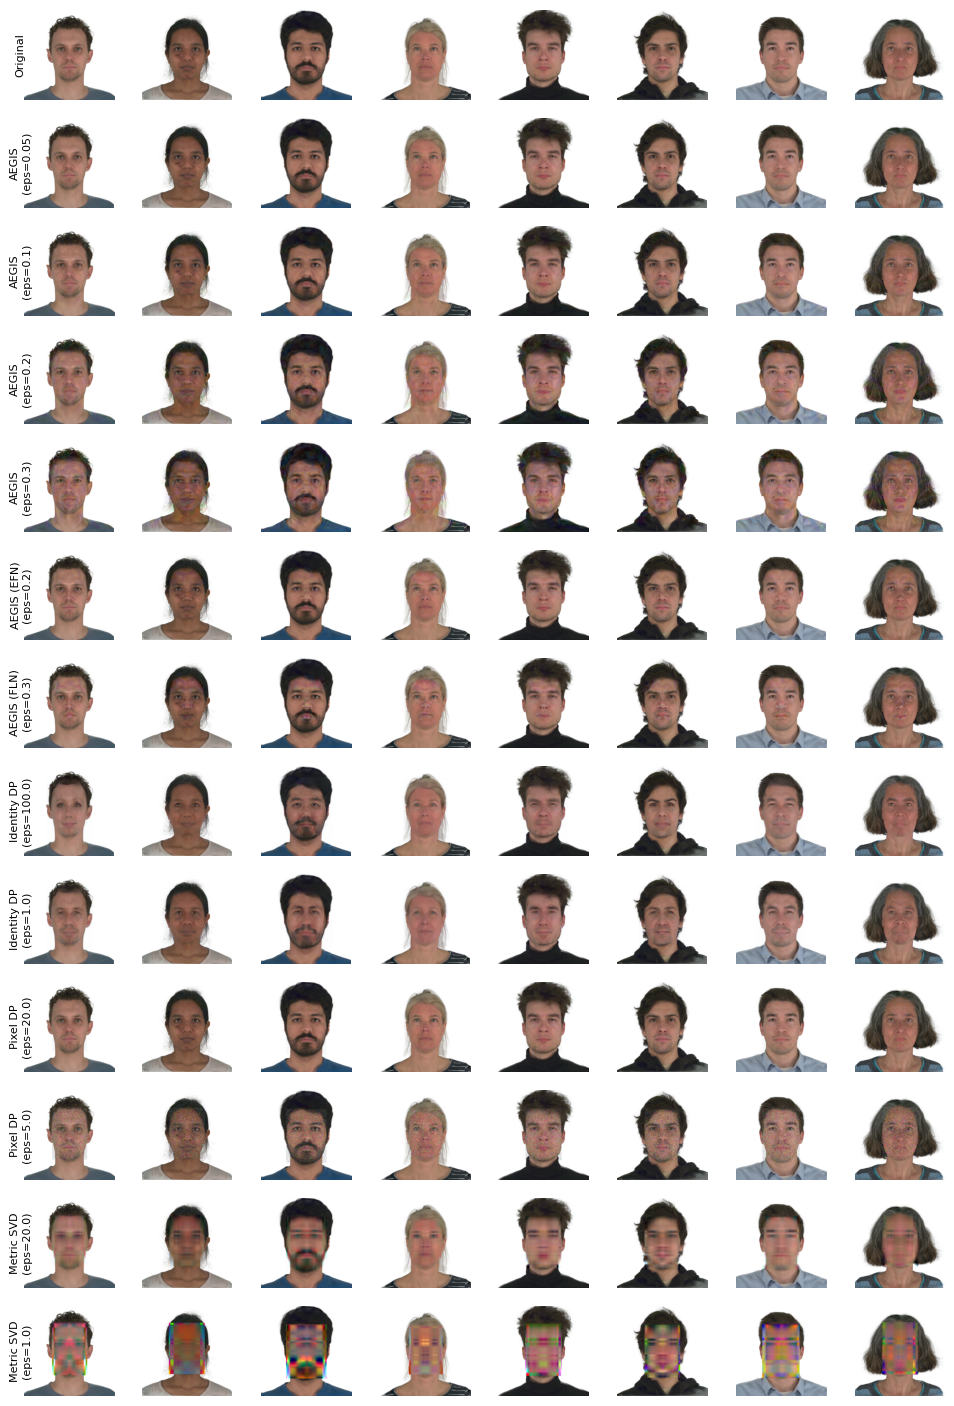

In [ ]:
import matplotlib.pyplot as plt
from pathlib import Path
import sys

ids = ["306", "264", "074", "302", "104", "140", "253", "304"]
base_path = Path("../datasets")

paths_config = {
    "Original": base_path / "NeRSembleReconst/renders/{id}.png",
    "AEGIS\n(eps=0.05)": base_path / "seed42" / "NeRSembleMasked_adaface_all/eps_0.050/renders/{id}.png",
    "AEGIS\n(eps=0.1)": base_path / "seed42" / "NeRSembleMasked_adaface_all/eps_0.100/renders/{id}.png",
    "AEGIS\n(eps=0.2)": base_path / "seed42" / "NeRSembleMasked_adaface_all/eps_0.200/renders/{id}.png",
    "AEGIS\n(eps=0.3)": base_path / "seed42" / "NeRSembleMasked_adaface_all/eps_0.300/renders/{id}.png",
    "AEGIS (EFN)\n(eps=0.2)": base_path / "seed42" / "NeRSembleMasked_adaface_eyes_forehead_nose/eps_0.200/renders/{id}.png",
    "AEGIS (FLN)\n(eps=0.3)": base_path / "seed42" / "NeRSembleMasked_adaface_forehead_lips_nose/eps_0.300/renders/{id}.png",
    "Identity DP\n(eps=100.0)": base_path / "NeRSembleReconst_identity_dp_eps100.0/{id}.png",
    "Identity DP\n(eps=1.0)": base_path / "NeRSembleReconst_identity_dp_eps1.0/{id}.png",
    "Pixel DP\n(eps=20.0)": base_path / "NeRSembleReconst_pixel_dp_eps20.0_b1/{id}.png",
    "Pixel DP\n(eps=5.0)": base_path / "NeRSembleReconst_pixel_dp_eps5.0_b1/{id}.png",
    "Metric SVD\n(eps=20.0)": base_path / "NeRSembleReconst_metric_privacy_eps20.0_k4/{id}.png",
    "Metric SVD\n(eps=1.0)": base_path / "NeRSembleReconst_metric_privacy_eps1.0_k4/{id}.png"
}

row_titles = list(paths_config.keys())
col_ids = ids

num_rows = len(row_titles) # 6
num_cols = len(col_ids)   # 4

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 18)) 

print("Generating vertical plot...")

for i, (title, template) in enumerate(paths_config.items()):
    
    # Inner loop: IDs (Columns)
    for j, id_val in enumerate(col_ids):
        
        img_path = Path(str(template).format(id=id_val))
        
        ax = axs[i, j] # Get the specific axis
        
        try:
            img = plt.imread(img_path)
            
            h, w, _ = img.shape
            if h > w:
                crop = (h - w) // 2
                img = img[crop:crop+w, :, :]
            else:
                crop = (w - h) // 2
                img = img[:, crop:crop+h, :]
            
            ax.imshow(img)
            
        except FileNotFoundError:
            print(f"Error: File not found at {img_path}", file=sys.stderr)
            ax.text(0.5, 0.5, 'Image\nNot Found', 
                    ha='center', va='center', fontsize=8, color='red',
                    transform=ax.transAxes)
        except Exception as e:
            print(f"Error loading {img_path}: {e}", file=sys.stderr)
            ax.text(0.5, 0.5, 'Load Error', 
                    ha='center', va='center', fontsize=8, color='red',
                    transform=ax.transAxes)
    
        ax.axis('off')
        
        if j == 0:
            ax.text(
                -0.03, # X position
                0.5,  # Y position
                title,
                transform=ax.transAxes,
                fontsize=8,
                ha='center',
                va='center',
                rotation=90
            )
            
output_filename_pdf = "figures/samples_full.pdf"
plt.savefig(output_filename_pdf, bbox_inches='tight') 
print(f"Saved vector PDF to: {output_filename_pdf}")

output_filename_png = "figures/samples_full.png"
plt.savefig(output_filename_png, dpi=300, bbox_inches='tight') 
print(f"Saved high-DPI PNG to: {output_filename_png}")
plt.show()